# Assignment - News Mood

While keeping up with the news agencies on their latest tweets, below is a  program to analyse their mood swings. BBC, CBS, CNN, Fox, nytimes are the 5 top new channels in scope of the project. 

In [2]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
import time
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
# Target Search Term
target_terms = ["@BBC", "@CBS", "@CNN", "@Fox", "@nytimes"]
counter = 0

# Variables for holding sentiments
results_list = {"NewsAgency":[],"Compound":[],"Positive":[],"Negative":[],"Neutral":[],"Tweets_Ago":[]}
# Loop through all target users
for target in target_terms:
    counter = 0
    # Variable for holding the oldest tweet
    oldest_tweet = None
   # Loop through 5 times
#     for x in range(5):

        # Run search around each tweet
    public_tweets = api.user_timeline(target,count=100)

    # Loop through all tweets
    for tweet in public_tweets:
            counter += 1
            tweet_id = tweet["id"]
            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]

            # Add each value to the appropriate list
            results_list["NewsAgency"].append(target)
            results_list["Compound"].append(compound)
            results_list["Positive"].append(pos)
            results_list["Negative"].append(neg)
            results_list["Neutral"].append(neu)
            results_list["Tweets_Ago"].append(counter)


        # Set the new oldest_tweet value
            oldest_tweet = tweet["id"] - 1
    time.sleep(30)
    # Store the Average Sentiments


In [4]:
newsagency_df = pd.DataFrame(results_list).round(3)
newsagency_df.head()

,NewsAgency,Compound,Positive,Negative,Neutral,Tweets_Ago
0,@BBC,0.000,0.000,0.000,1.000,1
1,@BBC,0.361,0.122,0.000,0.878,2
2,@BBC,0.000,0.000,0.000,1.000,3
3,@BBC,0.572,0.171,0.000,0.829,4
4,@BBC,0.402,0.222,0.156,0.623,5


In [5]:
# Save airline_df as .csv file
import csv
newsagency_df.to_csv('newsagency.csv', sep=',', encoding='utf-8',index=False)


In [6]:
# BBC Data
BBC_Data = newsagency_df[newsagency_df['NewsAgency'] =='@BBC']
BBC_Data.head()

,NewsAgency,Compound,Positive,Negative,Neutral,Tweets_Ago
0,@BBC,0.000,0.000,0.000,1.000,1
1,@BBC,0.361,0.122,0.000,0.878,2
2,@BBC,0.000,0.000,0.000,1.000,3
3,@BBC,0.572,0.171,0.000,0.829,4
4,@BBC,0.402,0.222,0.156,0.623,5


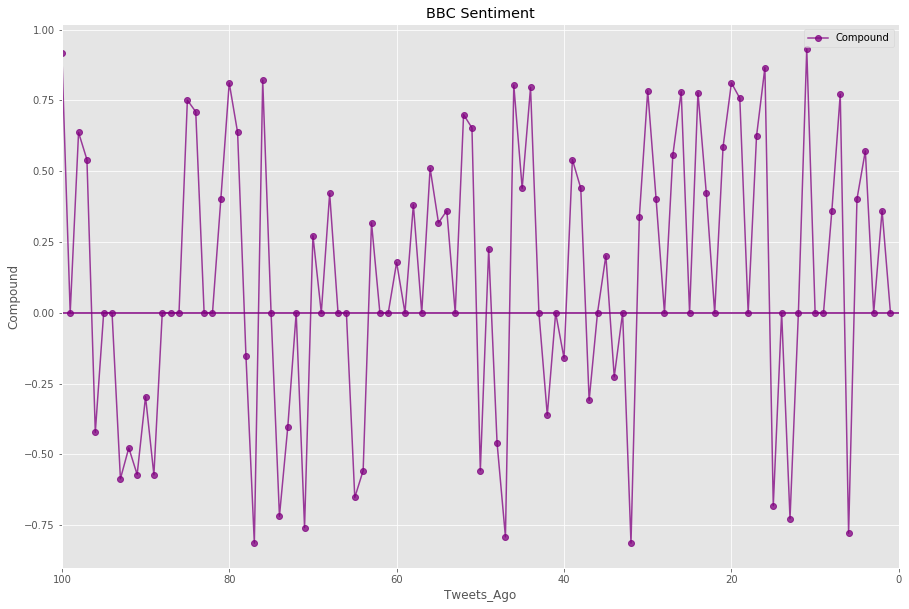

In [7]:
plt.figure(figsize=(15,10))
plt.plot(BBC_Data["Tweets_Ago"], BBC_Data["Compound"], marker="o", color="purple", linestyle='-',alpha=0.75)
plt.legend()
plt.xlim(100, 0)
BBCSentiment = "BBC Sentiment"

# Included a horizontal line at y = 0 to depict Equator

plt.axhline(y=0, color='purple', linestyle='-')
plt.title(BBCSentiment)
plt.ylabel("Compound")
plt.xlabel("Tweets_Ago")
plt.savefig('BBCSentimentPlot.png')

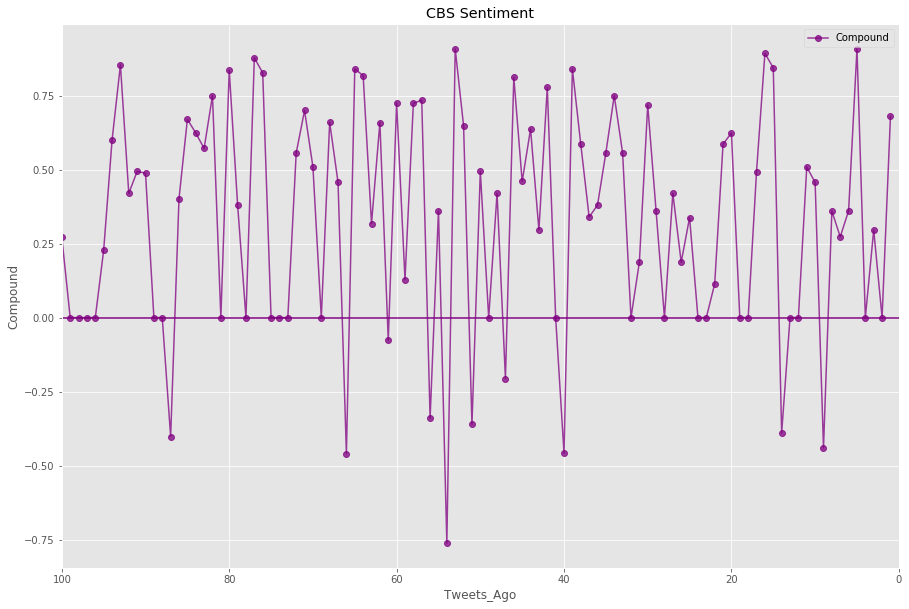

In [8]:
CBS_Data = newsagency_df[newsagency_df['NewsAgency'] =='@CBS']

plt.figure(figsize=(15,10))
plt.plot(CBS_Data["Tweets_Ago"], CBS_Data["Compound"], marker="o", color="purple", linestyle='-',alpha=0.75)
plt.legend()
plt.xlim(100, 0)
CBSSentiment = "CBS Sentiment"

# Included a horizontal line at y = 0 to depict Equator

plt.axhline(y=0, color='purple', linestyle='-')
plt.title(CBSSentiment)
plt.ylabel("Compound")
plt.xlabel("Tweets_Ago")
plt.savefig('CBSSentimentPlot.png')

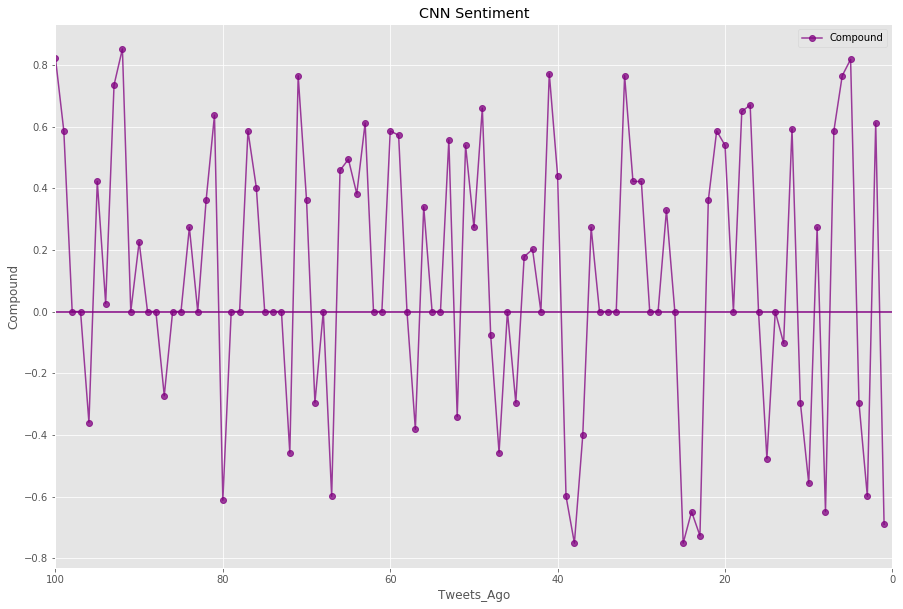

In [9]:
CNN_Data = newsagency_df[newsagency_df['NewsAgency'] =='@CNN']
CNN_Data

plt.figure(figsize=(15,10))
plt.plot(CNN_Data["Tweets_Ago"], CNN_Data["Compound"], marker="o", color="purple", linestyle='-',alpha=0.75)
plt.legend()
plt.xlim(100, 0)
CNNSentiment = "CNN Sentiment"

# Included a horizontal line at y = 0 to depict Equator

plt.axhline(y=0, color='purple', linestyle='-')
plt.title(CNNSentiment)
plt.ylabel("Compound")
plt.xlabel("Tweets_Ago")
plt.savefig('CNNSentimentPlot.png')

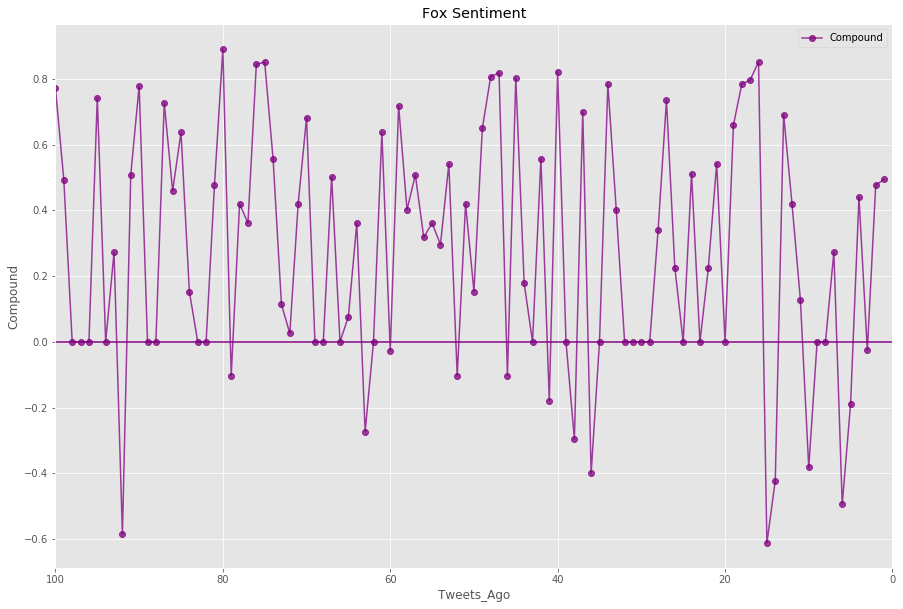

In [10]:
Fox_Data = newsagency_df[newsagency_df['NewsAgency'] =='@Fox']
Fox_Data

plt.figure(figsize=(15,10))
plt.plot(Fox_Data["Tweets_Ago"], Fox_Data["Compound"], marker="o", color="purple", linestyle='-',alpha=0.75)
plt.legend()
plt.xlim(100, 0)
FoxSentiment = "Fox Sentiment"

# Included a horizontal line at y = 0 to depict Equator

plt.axhline(y=0, color='purple', linestyle='-')
plt.title(FoxSentiment)
plt.ylabel("Compound")
plt.xlabel("Tweets_Ago")
plt.savefig('FOXSentimentPlot.png')

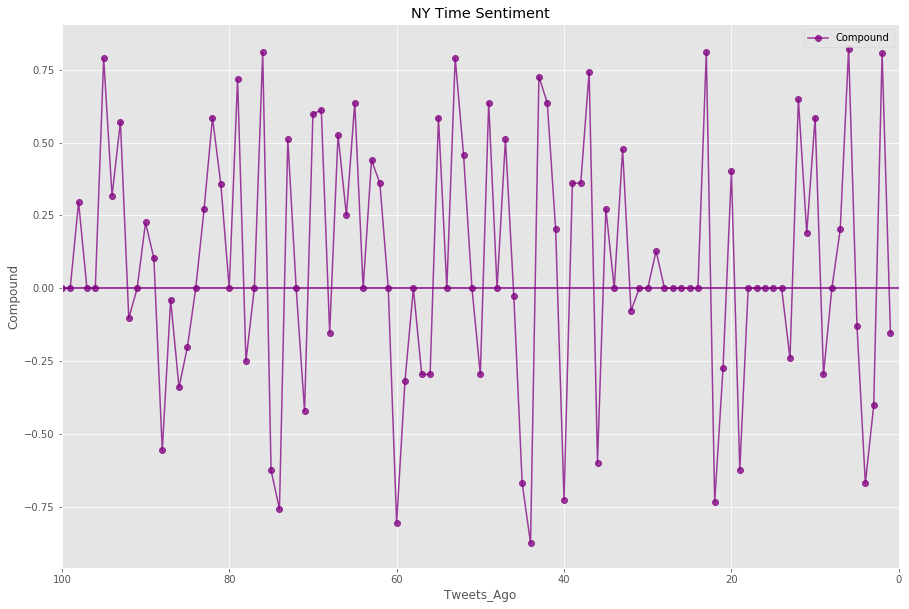

In [12]:
NYTimes_Data = newsagency_df[newsagency_df['NewsAgency'] =='@nytimes']
NYTimes_Data

plt.figure(figsize=(15,10))
plt.plot(NYTimes_Data["Tweets_Ago"], NYTimes_Data["Compound"], marker="o", color="purple", linestyle='-',alpha=0.75)
plt.legend()
plt.xlim(100, 0)
FoxSentiment = "NY Time Sentiment"

# Included a horizontal line at y = 0 to depict Equator

plt.axhline(y=0, color='purple', linestyle='-')
plt.title(FoxSentiment)
plt.ylabel("Compound")
plt.xlabel("Tweets_Ago")
plt.savefig('NYTimesSentimentPlot.png')